In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def read_csv_files(csv_files):
    data_frames = []
    for file in csv_files:
        df = pd.read_csv(file)
        data_frames.append(df)
    return pd.concat(data_frames)

In [3]:
def filter_df(df):
    return df[df['error'] == False]

In [25]:
csv_files_nl = ['data/data_nl.csv']
csv_files_de = ['data/data_de_1.csv','data/data_de_2.csv']
csv_files_fr = ['data/data_fr.csv']
csv_files_gb = ['data/data_gb_1.csv','data/data_gb_2.csv']
csv_files_ie = ['data/data_ie.csv']

df_nl = read_csv_files(csv_files_nl)
df_de = read_csv_files(csv_files_de)
df_fr = read_csv_files(csv_files_fr)
df_gb = read_csv_files(csv_files_gb)
df_ie = read_csv_files(csv_files_ie)

dfs = [df_nl,df_de,df_fr,df_gb,df_ie]

country_labels = ["The Netherlands", "Germany", "France", "The United Kingdom", "Ireland"]

dffs = []
for df in dfs:
    dffs.append(filter_df(df))
    
print(df_nl)

       index                                url accept-found accept-type  \
0        NaN                                NaN          NaN         NaN   
1        0.0              https://www.google.nl         True      button   
2        1.0                 https://www.cwi.nl         True        span   
3        2.0                  https://www.nu.nl         True      button   
4        3.0                 https://www.nos.nl        False         NaN   
...      ...                                ...          ...         ...   
4996  4995.0               https://www.benel.nl        False         NaN   
4997  4996.0            https://www.harmonie.nl        False         NaN   
4998  4997.0  https://www.limburgs-landschap.nl         True         div   
4999  4998.0    https://www.alphega-apotheek.nl         True           a   
5000  4999.0   https://www.kinderbescherming.nl        False         NaN   

           accept-text reject-found reject-type     reject-text  error  
0             

In [5]:
# Calculate the counts of accept-found and reject-found
accept_found_total = 0
reject_found_total = 0
sites_total = 0
sites_without_error_total = 0
error_total = 0

for df in dfs:
    filtered_df = df[df['error'] == False]
    sites_without_error_total += (~df['error'].astype(bool)).sum()
    error_total += df['error'].sum()
    accept_found_count = filtered_df['accept-found'].sum()
    reject_found_count = filtered_df['reject-found'].sum()
    accept_found_total += accept_found_count
    reject_found_total += reject_found_count
    
sites_total = sites_without_error_total + error_total

print(f"Total sites: {sites_total}")
print(f"Total sites without errors: {sites_without_error_total}")
print(f"Total errors found: {error_total}")
print(f"Total accept found: {accept_found_total}")
print(f"Total reject found: {reject_found_total}")

Total sites: 23304
Total sites without errors: 22207
Total errors found: 1097
Total accept found: 13522
Total reject found: 6016


In [19]:
all_accept_counts = []
all_reject_counts = []
all_totals_counts = []
percentage_websites_with_accept_without_reject = []

for i, df in enumerate(dfs):
    filtered_df = df[df['error'] == False]
    
    sites_without_error_total = (~df['error'].astype(bool)).sum()
    error_total = df['error'].sum()
    sites_total = sites_without_error_total + error_total
    all_totals_counts.append(sites_without_error_total)
    
    accept_found_count = filtered_df['accept-found'].sum()
    all_accept_counts.append(accept_found_count)
    reject_found_count = filtered_df['reject-found'].sum()
    all_reject_counts.append(reject_found_count)
    
    percentage_no_reject = 100-reject_found_count/accept_found_count*100
    
    print(country_labels[i])
    print(f"No. crawled sites: {sites_total}")
    print(f"No. sites that gave an error: {error_total}")
    print(f"No. sites without errors: {sites_without_error_total}")
    print(f"No. accept elements found: {accept_found_count}")
    print(f"No. reject elements found: {reject_found_count}")
    print(f"Percentage of sites with accept but without reject elements: {percentage_no_reject}")
    print("")

The Netherlands
No. crawled sites: 5000
No. sites that gave an error: 112
No. sites without errors: 4888
No. accept elements found: 2953
No. reject elements found: 1117
Percentage of sites with accept but without reject elements: 62.174060277683715

Germany
No. crawled sites: 4999
No. sites that gave an error: 191
No. sites without errors: 4808
No. accept elements found: 2763
No. reject elements found: 1337
Percentage of sites with accept but without reject elements: 51.61056822294607

France
No. crawled sites: 5000
No. sites that gave an error: 198
No. sites without errors: 4802
No. accept elements found: 2997
No. reject elements found: 1916
Percentage of sites with accept but without reject elements: 36.0694027360694

The United Kingdom
No. crawled sites: 5000
No. sites that gave an error: 457
No. sites without errors: 4543
No. accept elements found: 2915
No. reject elements found: 818
Percentage of sites with accept but without reject elements: 71.93825042881647

Ireland
No. crawled

[60.41325695581015, 57.4667221297837, 62.41149521032903, 64.16464891041163, 59.82312065698042] [22.851882160392798, 27.80782029950083, 39.90004164931278, 18.00572309046885, 26.152874289324068]


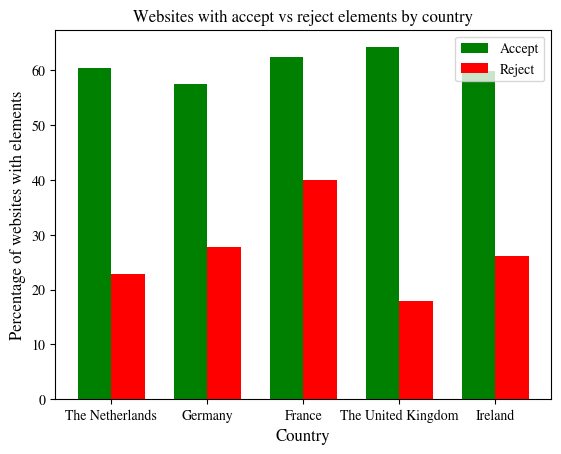

<Figure size 7680x5760 with 0 Axes>

In [45]:
# Tex parameters
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.figure(dpi=1200)

# Create relative accept and reject counts
relative_accept_counts = [x / y * 100 for x, y in zip(all_accept_counts, all_totals_counts)]
relative_reject_counts = [x / y * 100 for x, y in zip(all_reject_counts, all_totals_counts)]

print(relative_accept_counts,relative_reject_counts)

# Create index + bar width
index = np.arange(len(country_labels))
bar_width = 0.35

# Create a bar plot
plt.bar(index, relative_accept_counts, bar_width, color='green', label='Accept')
plt.bar(index + bar_width, relative_reject_counts, bar_width, color='red', label='Reject')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of websites with elements', fontsize=12)
plt.title('Websites with accept vs reject elements by country')
plt.xticks(index + bar_width / 2, country_labels)
plt.legend()

# Adjust the figure layout to accommodate the legend
#plt.tight_layout()

# Display the plot
plt.figure(dpi=1200)
plt.show()




107


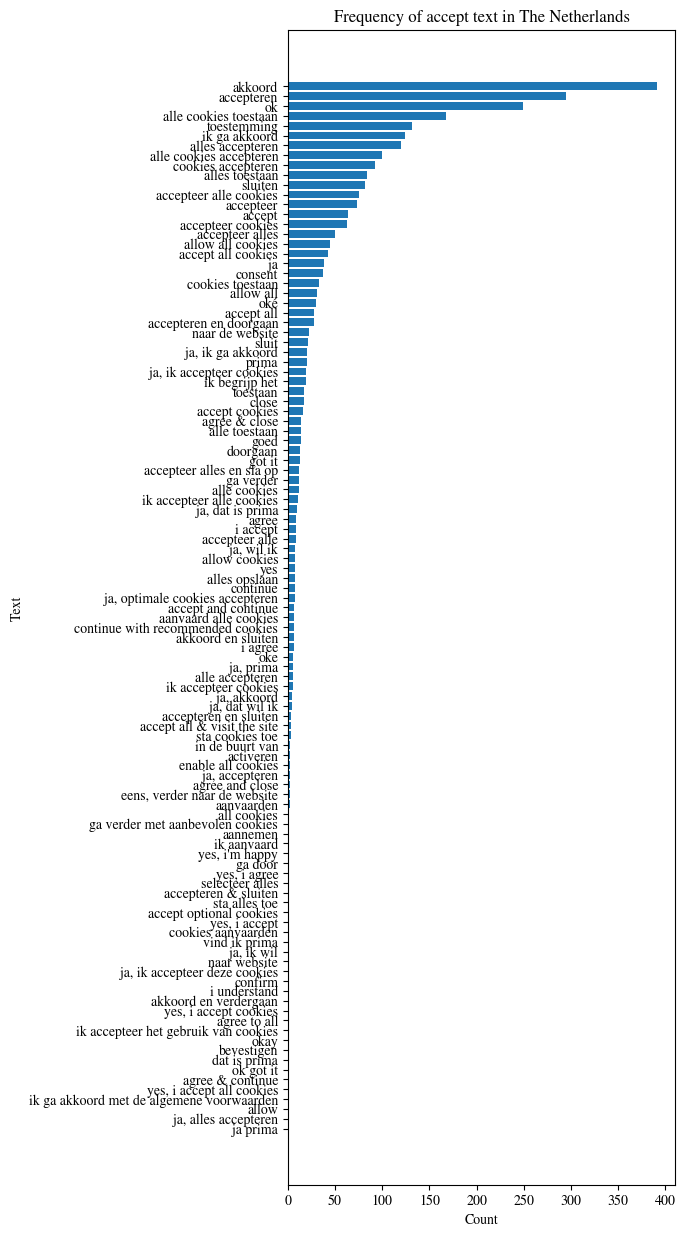

107


/home/gijs/miniconda3/envs/openwpm/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10004 (\N{HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


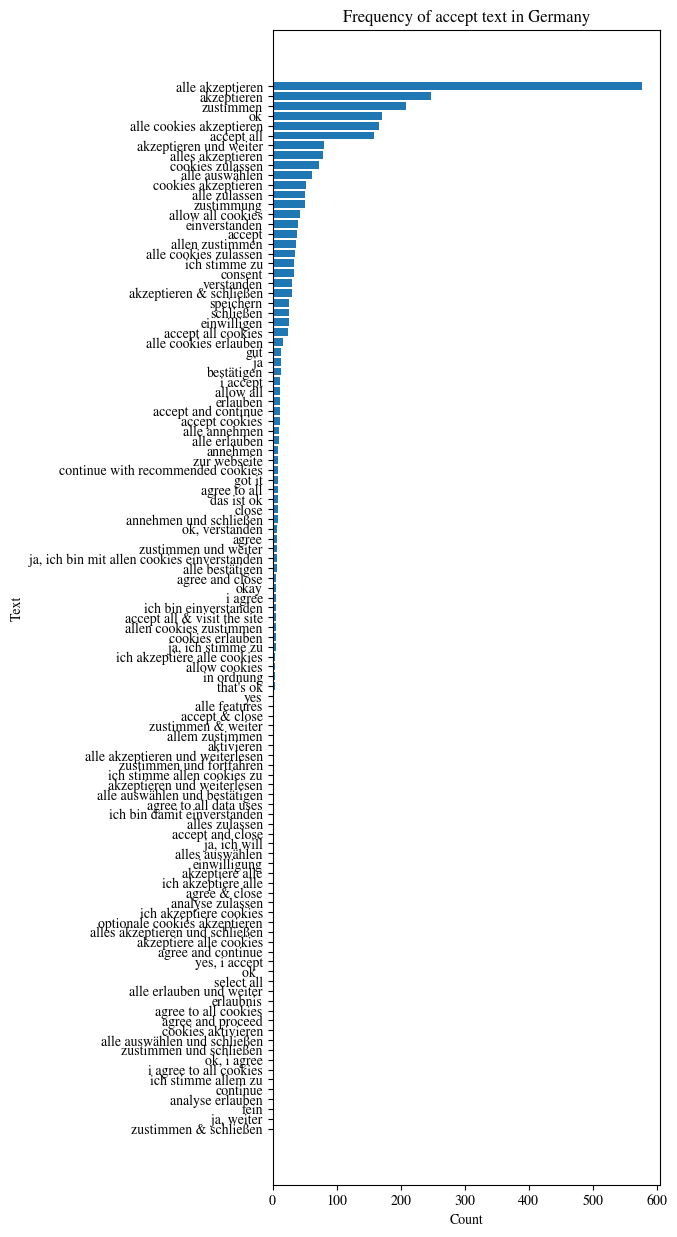

82


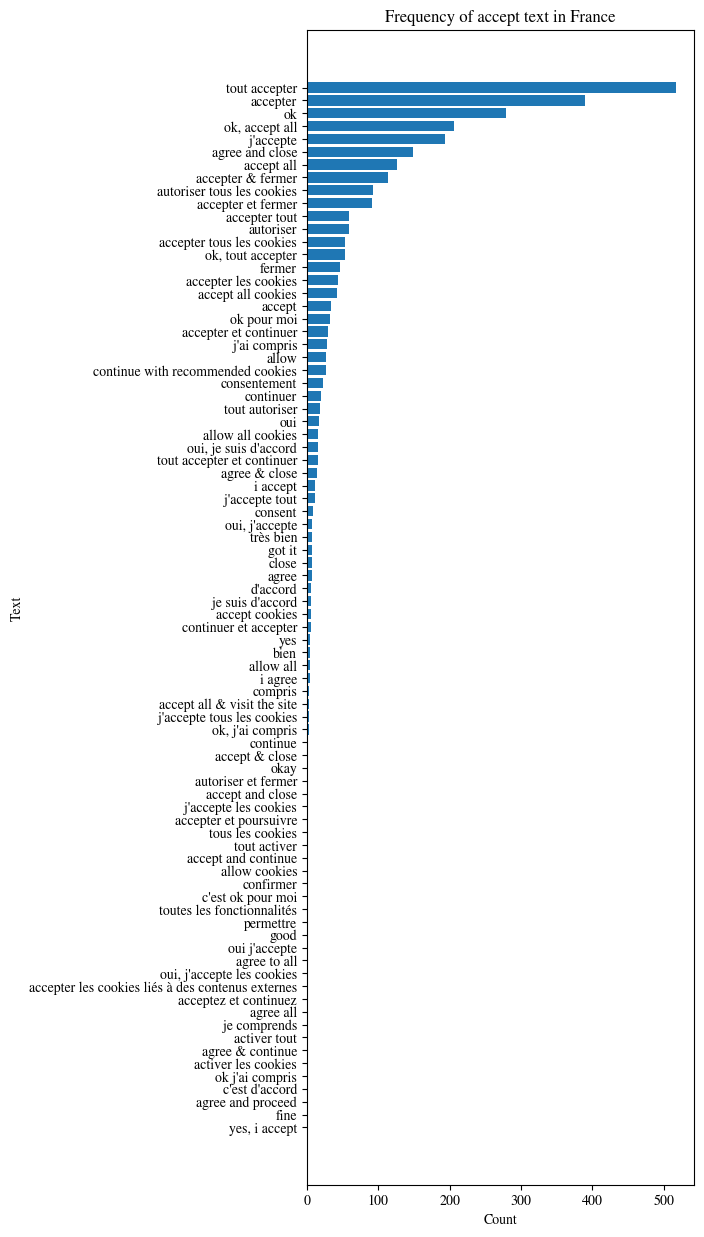

83


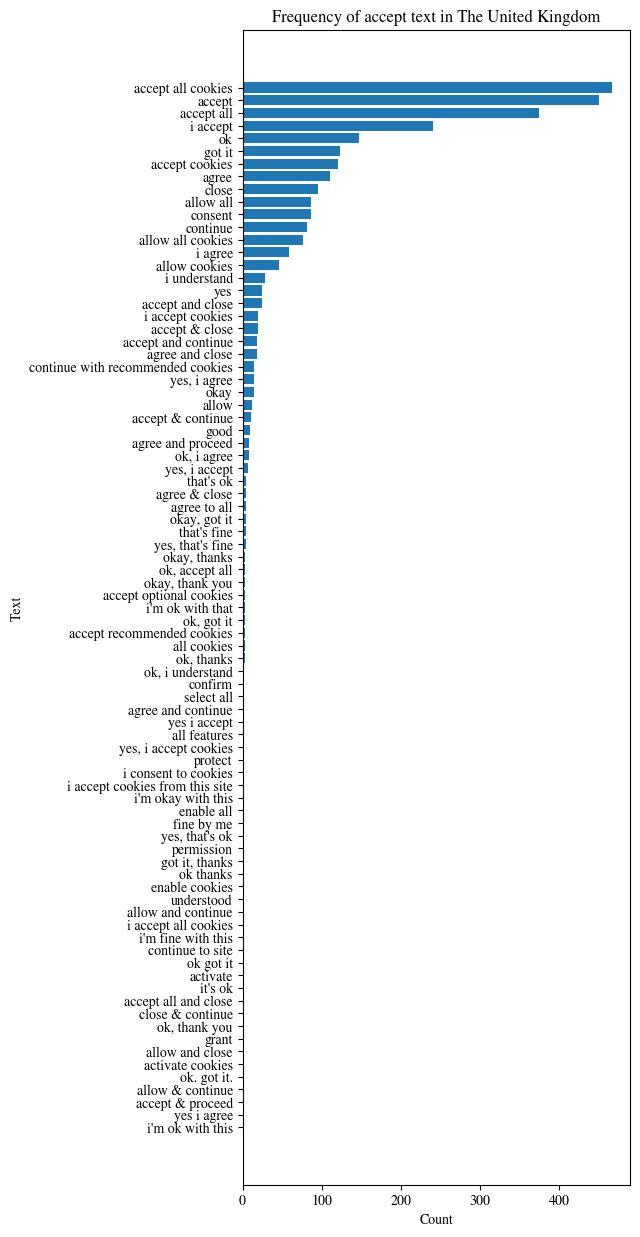

57


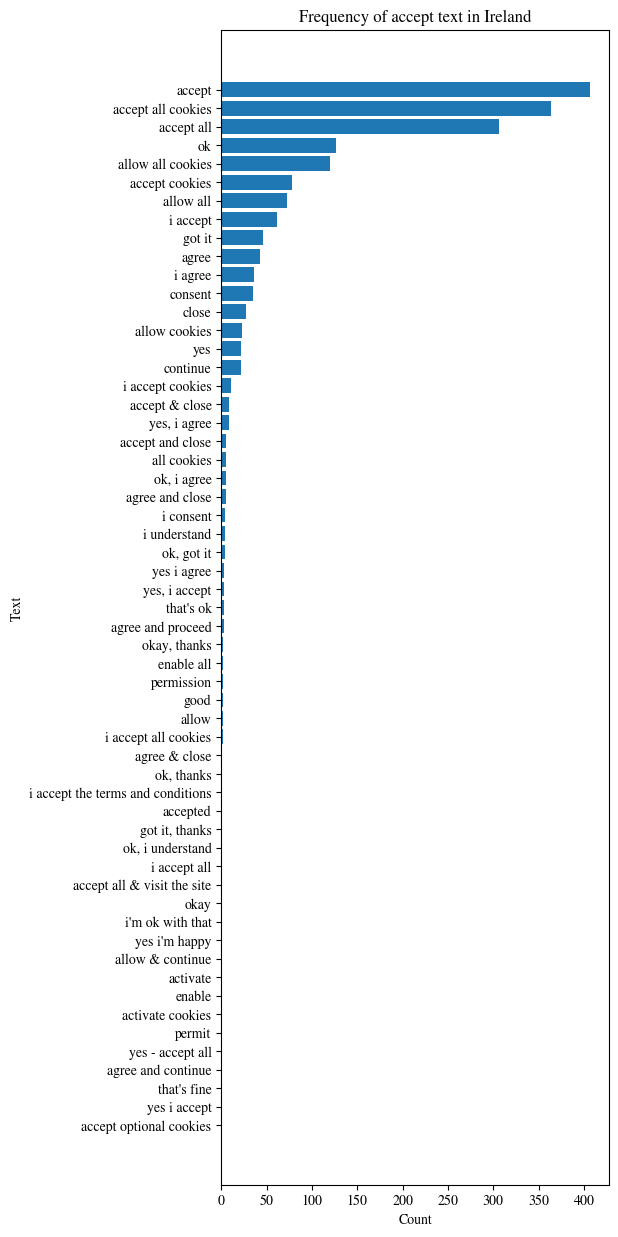

In [53]:
for i, df in enumerate(dffs):
    accept_text_counts = df['accept-text'].value_counts()
    #top_accept_text_counts = accept_text_counts.head(50)
    print(accept_text_counts.size)

    # Create bar plot
    plt.figure(figsize=(5,15))
    plt.barh(accept_text_counts.index, accept_text_counts.values)
    plt.xlabel('Count')
    plt.ylabel('Text')
    plt.title(f'Frequency of accept text in {country_labels[i]}')
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

10


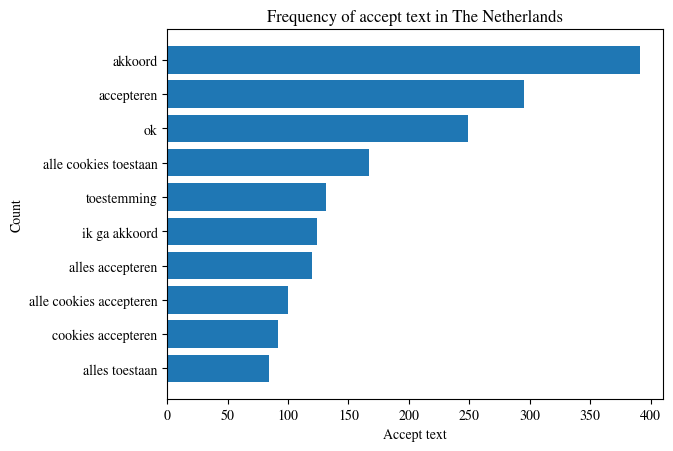

10


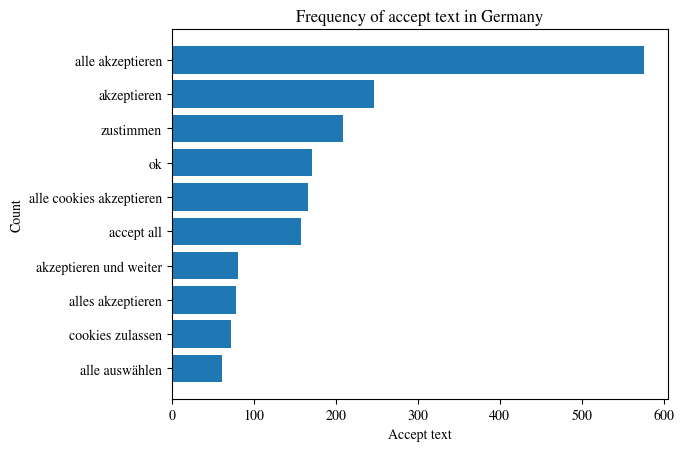

10


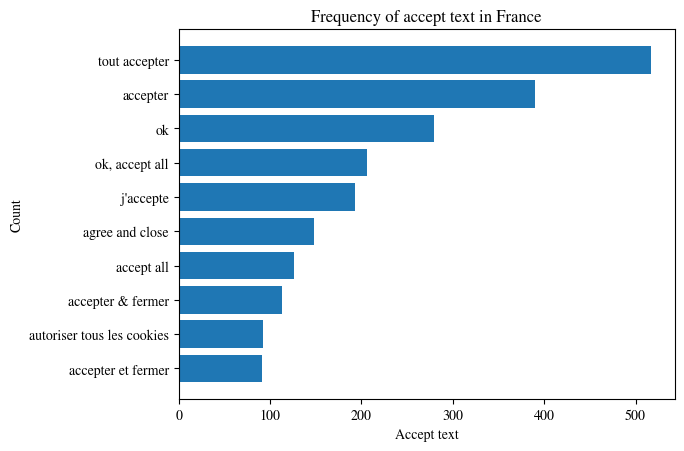

10


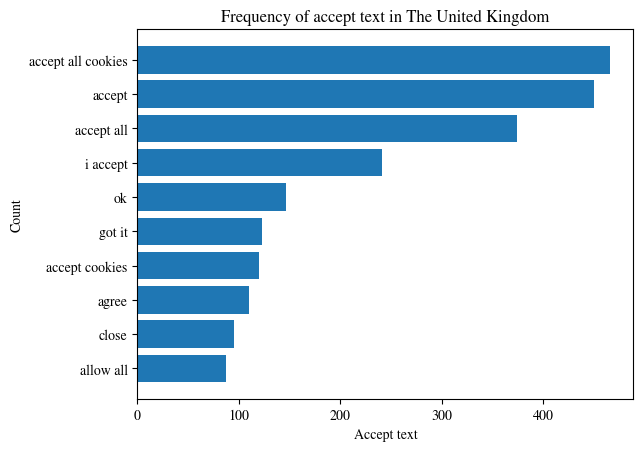

10


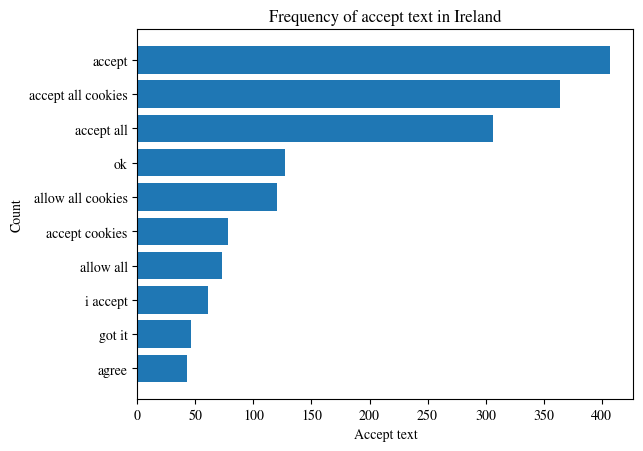

In [36]:
for i, df in enumerate(dffs):
    accept_text_counts = df['accept-text'].value_counts()
    top_accept_text_counts = accept_text_counts.head(10)
    print(top_accept_text_counts.size)

    # Create bar plot
    #plt.figure(figsize=(5,15))
    plt.barh(top_accept_text_counts.index, top_accept_text_counts.values)
    plt.xlabel('Count')
    plt.ylabel('Text')
    plt.title(f'Frequency of accept text in {country_labels[i]}')
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

87


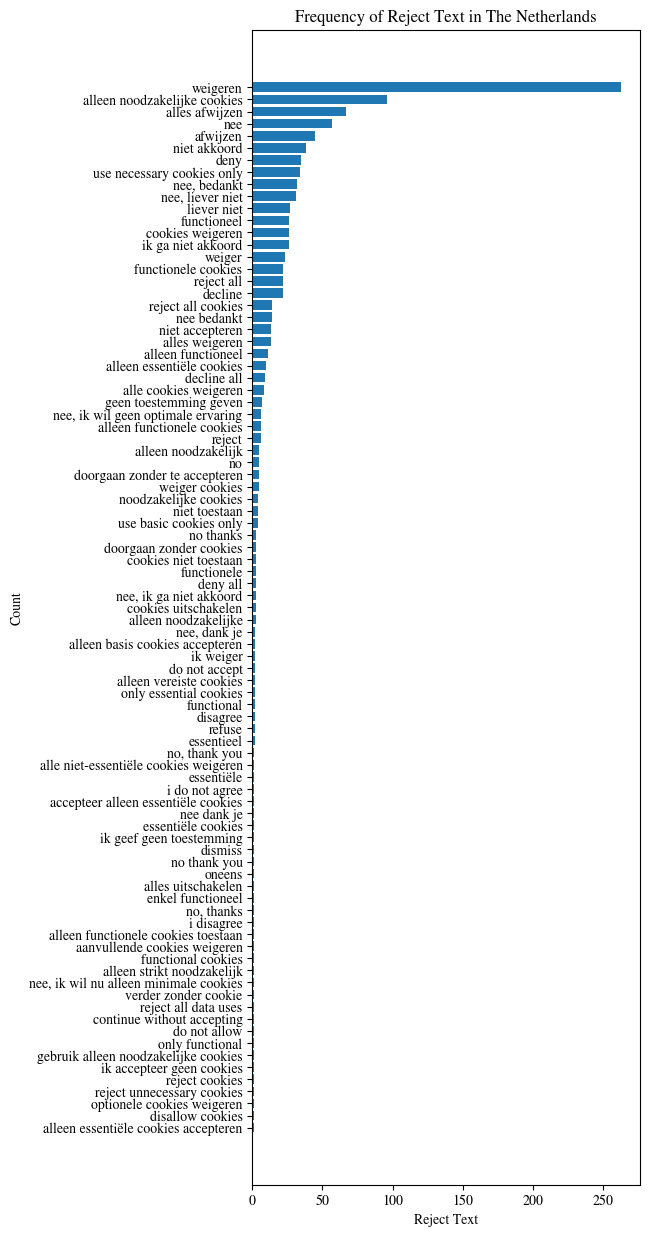

86


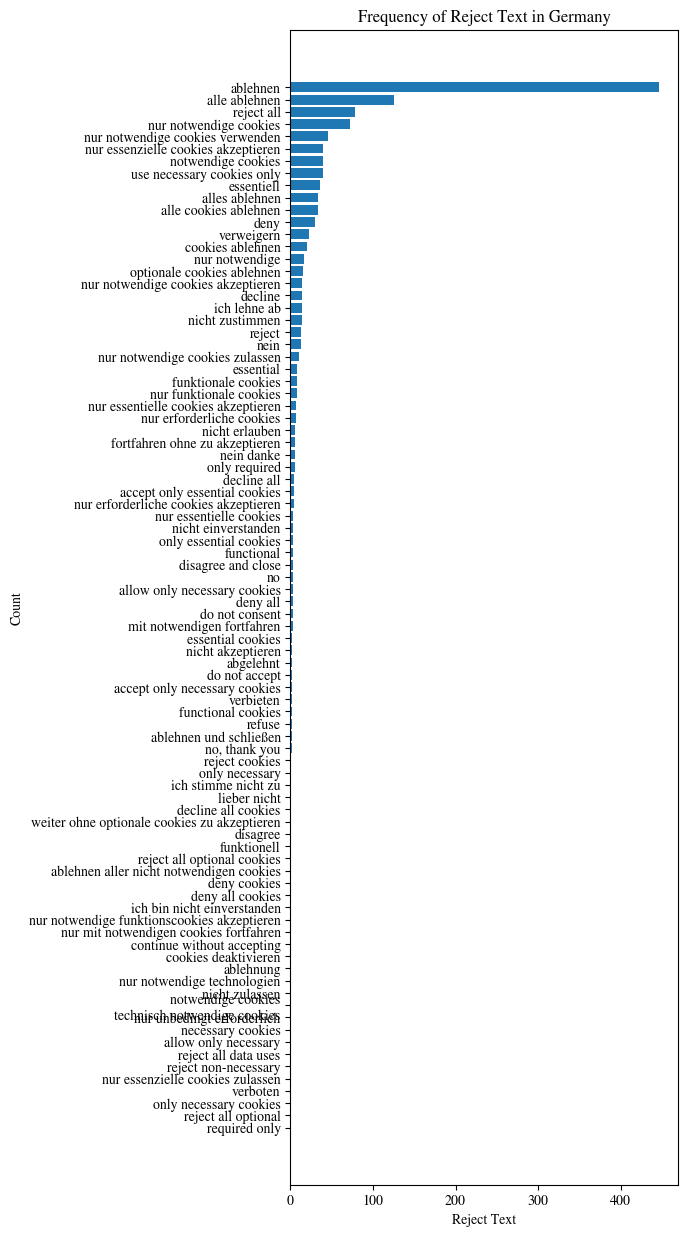

70


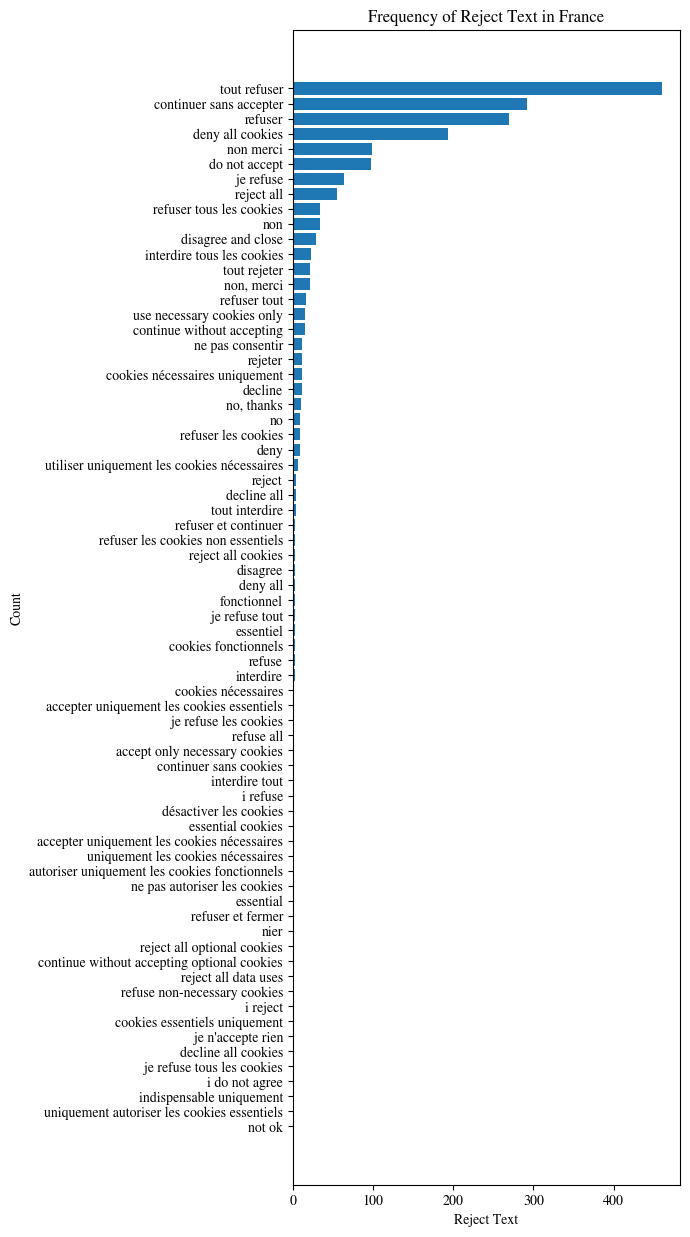

62


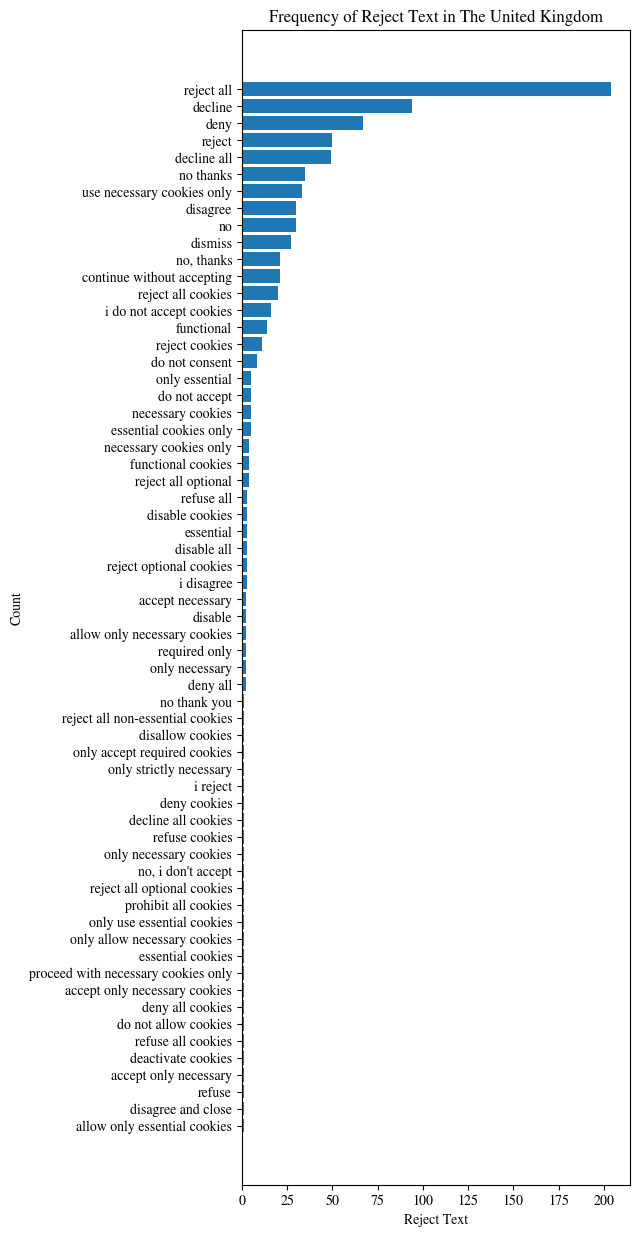

47


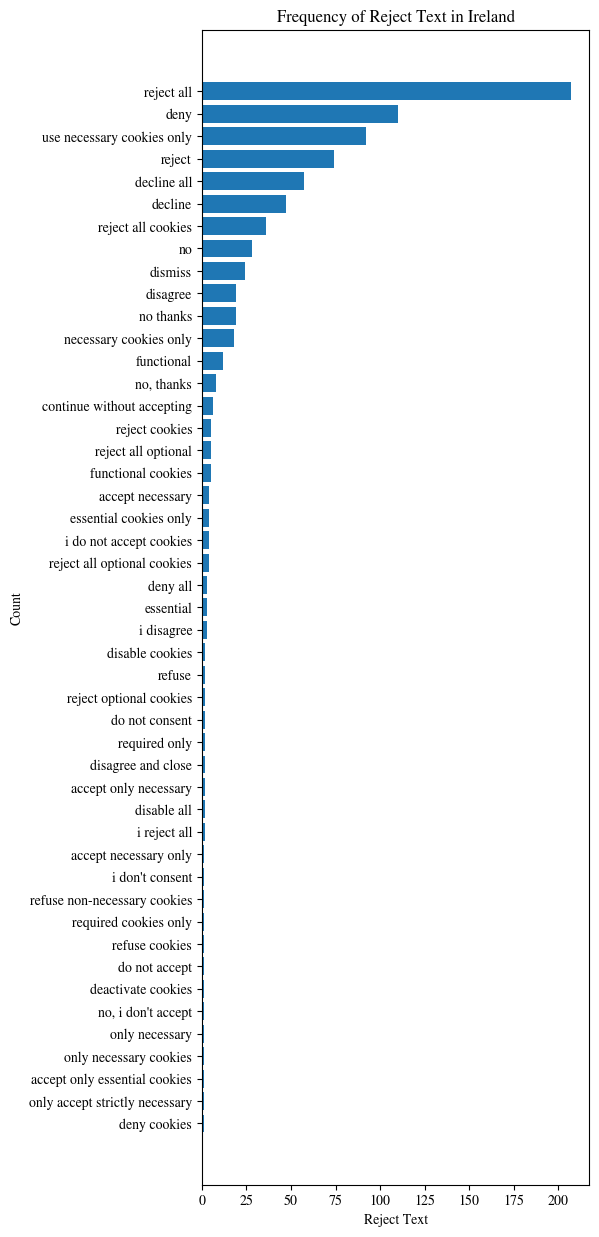

In [9]:
for i, df in enumerate(dffs):
    reject_text_counts = df['reject-text'].value_counts()
    #top_reject_text_counts = reject_text_counts.head(50)
    print(reject_text_counts.size)

    # Create bar plot
    plt.figure(figsize=(5, 15))
    plt.barh(reject_text_counts.index, reject_text_counts.values)
    plt.xlabel('Count')
    plt.ylabel('Text')
    plt.title(f'Frequency of Reject Text in {country_labels[i]}')
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

10


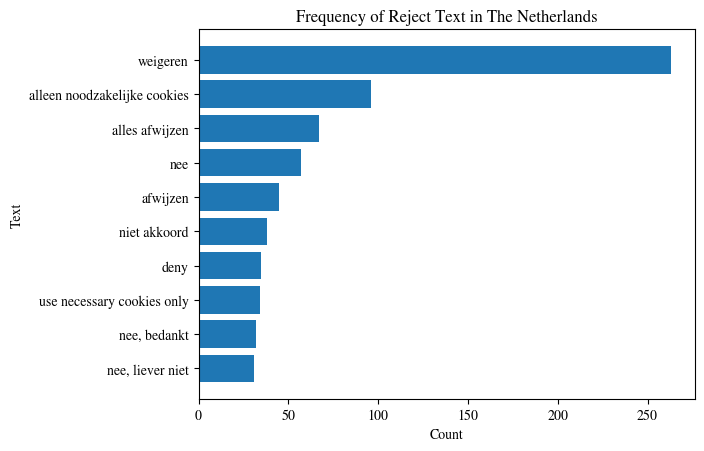

10


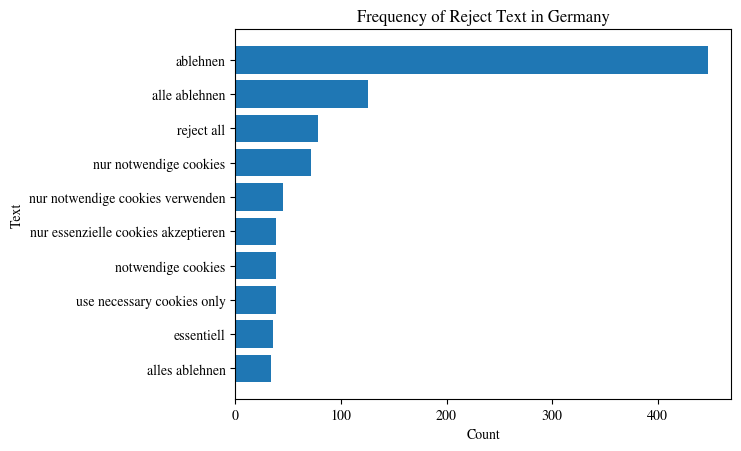

10


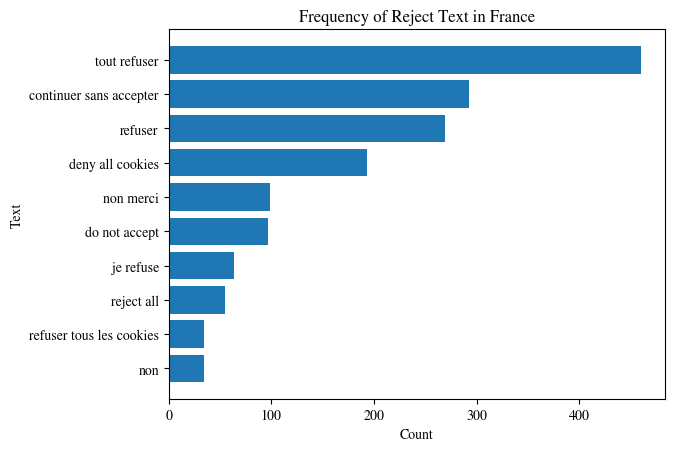

10


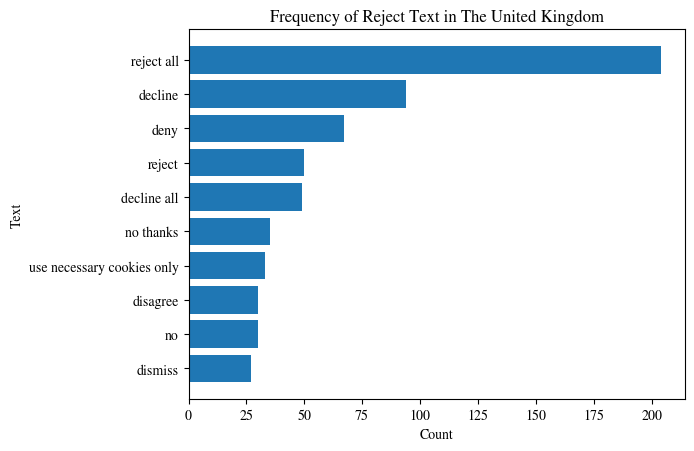

10


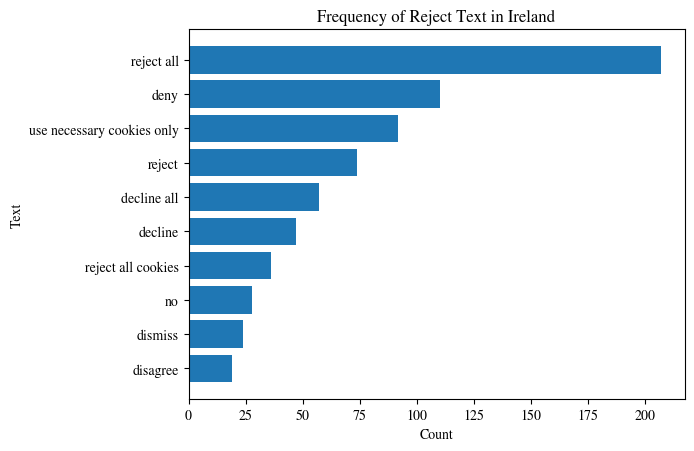

In [39]:
for i, df in enumerate(dffs):
    reject_text_counts = df['reject-text'].value_counts()
    top_reject_text_counts = reject_text_counts.head(10)
    print(top_reject_text_counts.size)

    # Create bar plot
    #plt.figure(figsize=(5, 15))
    plt.barh(top_reject_text_counts.index, top_reject_text_counts.values)
    plt.xlabel('Count')
    plt.ylabel('Text')
    plt.title(f'Frequency of Reject Text in {country_labels[i]}')
    plt.gca().invert_yaxis()
    
    # Display the plot
    plt.show()

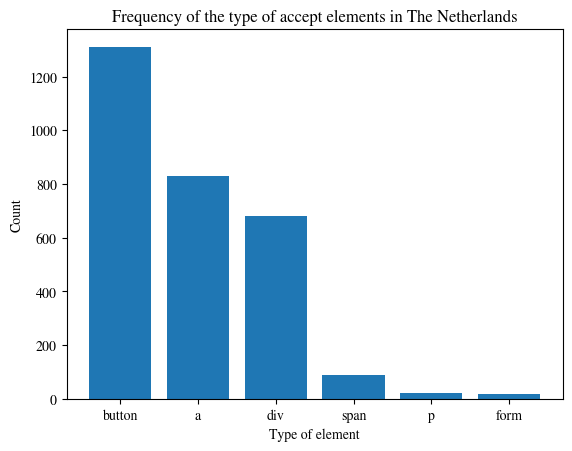

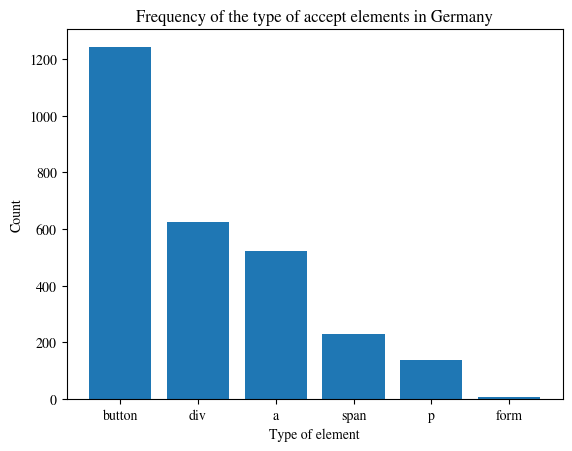

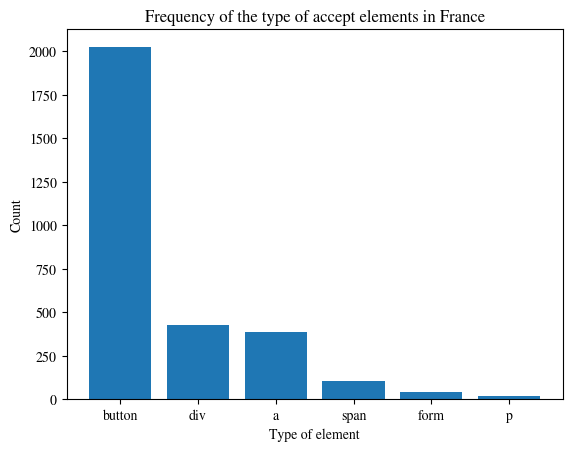

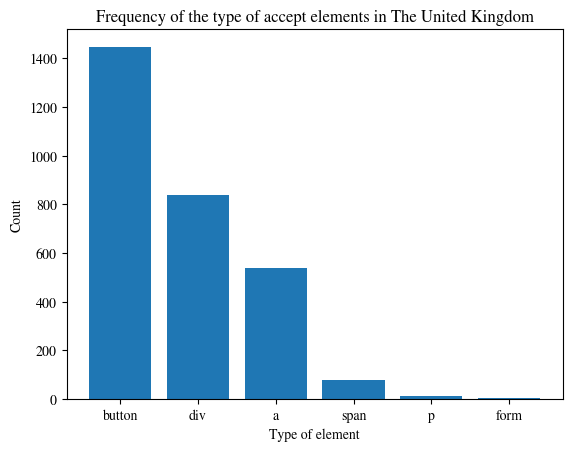

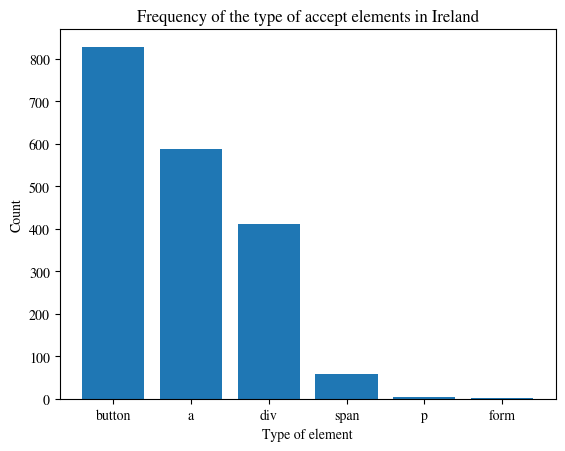

In [62]:
for i, df in enumerate(dffs):
    accept_types_counts = df['accept-type'].value_counts()

    # Create bar plot
    plt.bar(accept_types_counts.index, accept_types_counts.values)
    plt.xlabel('Type of element')
    plt.ylabel('Count')
    plt.title(f'Frequency of the type of accept elements in {country_labels[i]}')

    # Show the plot
    plt.show()

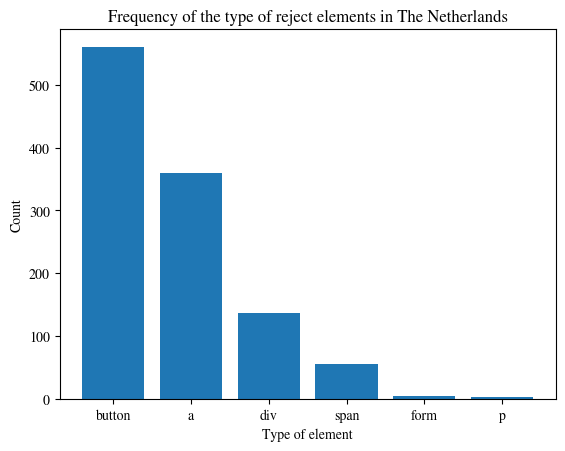

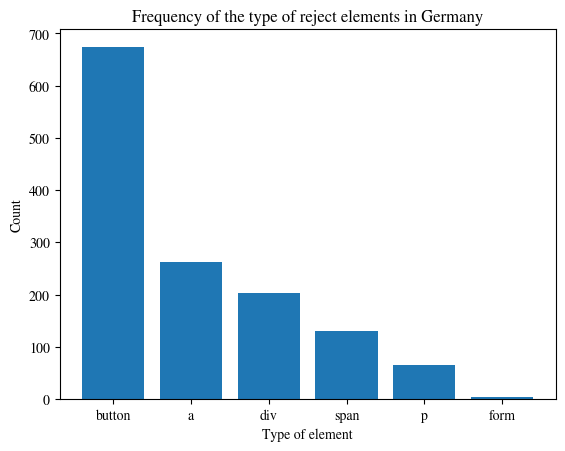

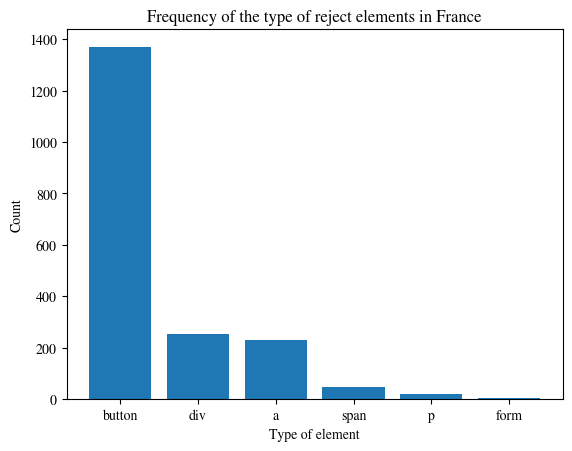

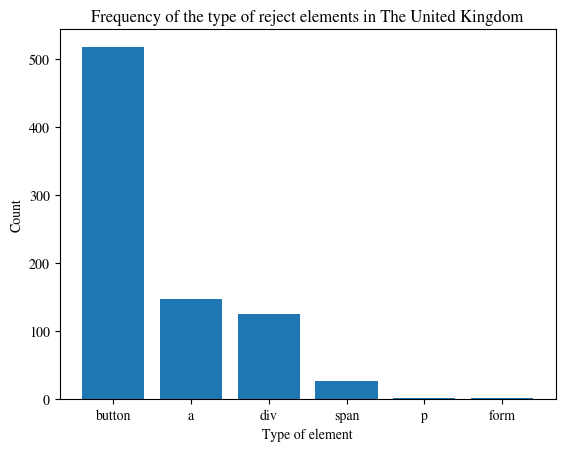

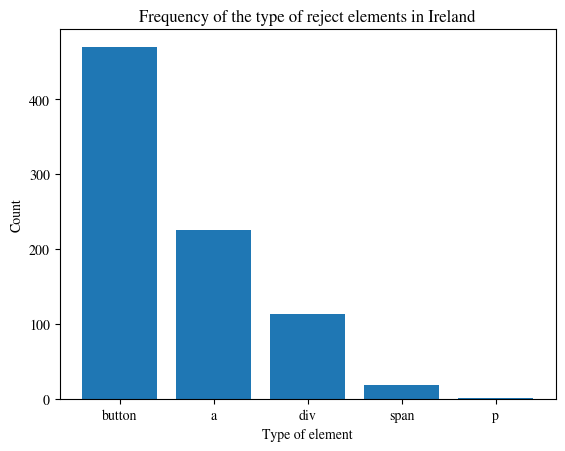

In [11]:
for i, df in enumerate(dffs):
    reject_types_counts = df['reject-type'].value_counts()

    # Create bar plot
    plt.bar(reject_types_counts.index, reject_types_counts.values)
    plt.xlabel('Type of element')
    plt.ylabel('Count')
    plt.title(f'Frequency of the type of reject elements in {country_labels[i]}')

    # Show the plot
    plt.show()

In [12]:
dfs_validation = [[], [], [], [], []]
for df in dfs:
    df.sample(50)['url'].to_string(index=False)
  

In [13]:
csv_files_nl_val = ['data_validation/data_validation_nl.csv']
csv_files_de_val = ['data_validation/data_validation_de.csv']
csv_files_fr_val = ['data_validation/data_validation_fr.csv']
csv_files_gb_val = ['data_validation/data_validation_gb.csv']
csv_files_ie_val = ['data_validation/data_validation_ie.csv']

df_nl_val = read_csv_files(csv_files_nl_val)
df_de_val = read_csv_files(csv_files_de_val)
df_fr_val = read_csv_files(csv_files_fr_val)
df_gb_val = read_csv_files(csv_files_gb_val)
df_ie_val = read_csv_files(csv_files_ie_val)

dfs_val = [df_nl_val,df_de_val,df_fr_val,df_gb_val,df_ie_val]

In [14]:
total_false_positives = 0
total_false_negatives = 0

for i, df in enumerate(dfs_val):

    # Count instances of "fn" and "fp" in "accept-correct" column
    accept_correct_counts = df["accept-correct"].value_counts()
    fn_accept_count = accept_correct_counts.get("fn", 0)
    fp_accept_count = accept_correct_counts.get("fp", 0)
    
    # Count instances of "fn" and "fp" in "reject-correct" column
    reject_correct_counts = df["reject-correct"].value_counts()
    fn_reject_count = reject_correct_counts.get("fn", 0)
    fp_reject_count = reject_correct_counts.get("fp", 0)
    
    # Get totals
    total_false_positives += fp_accept_count + fp_reject_count
    total_false_negatives += fn_accept_count + fn_reject_count
    
    print(country_labels[i])
    print("False negatives in accept:", fn_accept_count)
    print("False positives in accept:", fp_accept_count)
    print("False negatives in reject:", fn_reject_count)
    print("False positives in reject:", fp_reject_count)

print("")
print("Total false positives:", total_false_positives)
print("Total false negatives:", total_false_negatives)

The Netherlands
False negatives in accept: 3
False positives in accept: 4
False negatives in reject: 2
False positives in reject: 1
Germany
False negatives in accept: 8
False positives in accept: 2
False negatives in reject: 4
False positives in reject: 1
France
False negatives in accept: 2
False positives in accept: 3
False negatives in reject: 3
False positives in reject: 1
The United Kingdom
False negatives in accept: 3
False positives in accept: 1
False negatives in reject: 0
False positives in reject: 0
Ireland
False negatives in accept: 0
False positives in accept: 1
False negatives in reject: 0
False positives in reject: 1

Total false positives: 15
Total false negatives: 25


In [32]:
# Function to extract domain from URL
def extract_domain(url):
    return str(url).replace('https://www.', '')  # Convert to string and remove prefix

In [33]:
# Load TRANCO CSV file
tranco_df_nl = pd.read_csv('websites/tranco_lists/tranco_LYZ84.csv', names=['index', 'domain'])
tranco_df_de = pd.read_csv('websites/tranco_lists/tranco_W9GV9.csv', names=['index', 'domain'])
tranco_df_fr = pd.read_csv('websites/tranco_lists/tranco_PZP5J.csv', names=['index', 'domain'])
tranco_df_gb = pd.read_csv('websites/tranco_lists/tranco_Y5JZG.csv', names=['index', 'domain'])
tranco_df_ie = pd.read_csv('websites/tranco_lists/tranco_992J2.csv', names=['index', 'domain'])

tranco_lists = [tranco_df_nl,tranco_df_de,tranco_df_fr,tranco_df_gb,tranco_df_ie]
rankings = []

for i,df in enumerate(dfs):
    data_df = df.drop(0)
    # Apply domain extraction and lookup
    data_df['domain'] = data_df['url'].apply(extract_domain)
    data_df = data_df.merge(tranco_lists[i], on='domain', how='left')

    rankings.append(data_df[['url', 'index_y']])

print(rankings)

[                                    url  index_y
0                 https://www.google.nl     1042
1                    https://www.cwi.nl     1792
2                     https://www.nu.nl     2045
3                    https://www.nos.nl     2164
4                     https://www.uu.nl     2412
...                                 ...      ...
4995               https://www.benel.nl   135612
4996            https://www.harmonie.nl   135619
4997  https://www.limburgs-landschap.nl   135622
4998    https://www.alphega-apotheek.nl   135643
4999   https://www.kinderbescherming.nl   135644

[5000 rows x 2 columns],                                  url  index_y
0              https://www.google.de      138
1              https://www.amazon.de      256
2             https://www.spiegel.de      584
3            https://www.t-online.de      979
4                https://www.ebay.de     1039
...                              ...      ...
4994  https://www.frankfurtticket.de   120290
4995         http

In [34]:
# Empty lists to store the statistics
min_rank = []
max_rank = []
median_rank = []
avg_rank = []

# Iterate over each DataFrame
for df in rankings:
    # Calculate statistics
    min_rank.append(df['index_y'].min())
    max_rank.append(df['index_y'].max())
    median_rank.append(df['index_y'].median())
    avg_rank.append(df['index_y'].mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Min Rank': min_rank,
    'Max Rank': max_rank,
    'Median Rank': median_rank,
    'Average Rank': avg_rank
})

print(summary_df)

   Min Rank  Max Rank  Median Rank   Average Rank
0      1042    135644     109314.5   99490.506200
1       138    120357      79297.0   73488.209842
2       292    152741     113187.5  102092.335600
3       102    184607     126024.5  115512.361800
4      1939     90007      82398.0   75573.018154


In [105]:
banner_count = []

for df in dffs:
    banner_count.append(((df['accept-found'] == True) | (df['reject-found'] == True)).sum())
    
banner_count

[3010, 2860, 3120, 2974, 1919]

In [65]:
sum(banner_count)

13883

In [69]:
merged_dfs = []
for i,df in enumerate(rankings):
    merged_df = pd.merge(df, dffs[i], on='url', how='left')
    merged_dfs.append(merged_df[['url', 'index_y', 'accept-found', 'reject-found']])

[                                    url  index_y accept-found reject-found
 0                 https://www.google.nl     1042         True         True
 1                    https://www.cwi.nl     1792         True         True
 2                     https://www.nu.nl     2045         True        False
 3                    https://www.nos.nl     2164        False        False
 4                     https://www.uu.nl     2412        False        False
 ...                                 ...      ...          ...          ...
 4995               https://www.benel.nl   135612        False        False
 4996            https://www.harmonie.nl   135619        False        False
 4997  https://www.limburgs-landschap.nl   135622         True         True
 4998    https://www.alphega-apotheek.nl   135643         True        False
 4999   https://www.kinderbescherming.nl   135644        False        False
 
 [5000 rows x 4 columns],
                                  url  index_y accept-found 

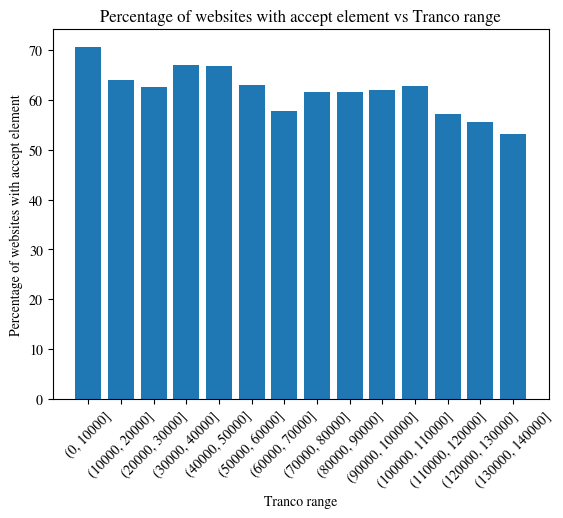

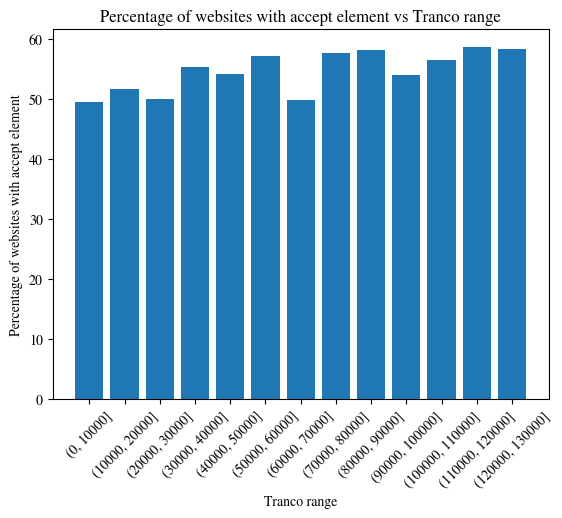

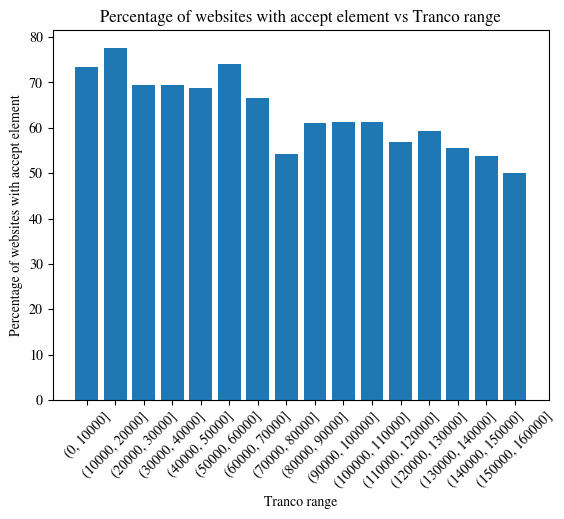

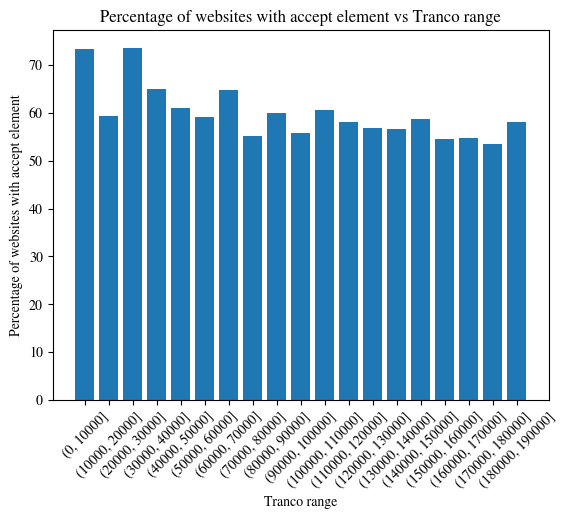

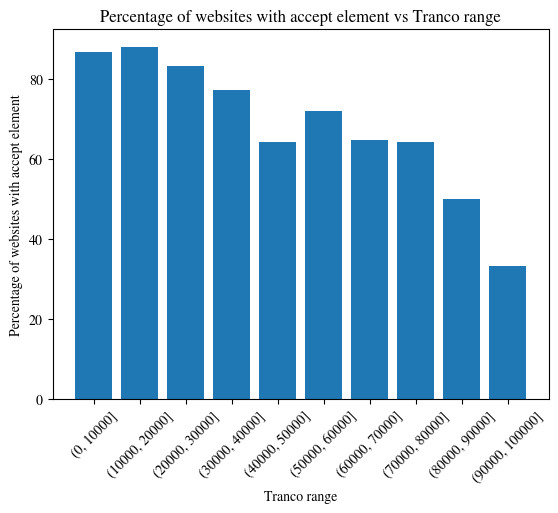

In [106]:
for df in merged_dfs:

    # Define the range and bin size
    start_range = 0
    end_range = df['index_y'].max()
    bin_size = 10000

    # Create bins based on the range and bin size
    bins = pd.cut(df['index_y'], bins=range(start_range, end_range+bin_size, bin_size))

    # Count the number of accept-found values within each bin
    accept_counts = df[df['accept-found'] == True].groupby(bins)['accept-found'].count()
    total_counts = df.groupby(bins)['url'].size()
    #print(total_counts)
    relative_counts = accept_counts/total_counts*100

    # Plot the bin counts
    plt.bar(relative_counts.index.astype(str), relative_counts.values)
    plt.xlabel('Tranco range')
    plt.ylabel('Percentage of websites with accept element')
    plt.title('Percentage of websites with accept element vs Tranco range')
    plt.xticks(rotation=45)
    plt.show()

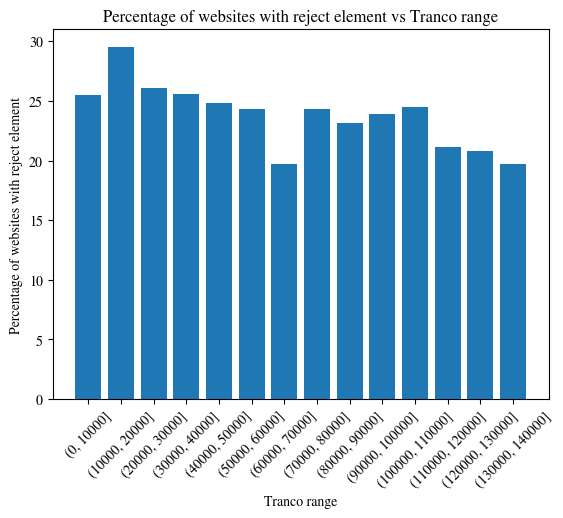

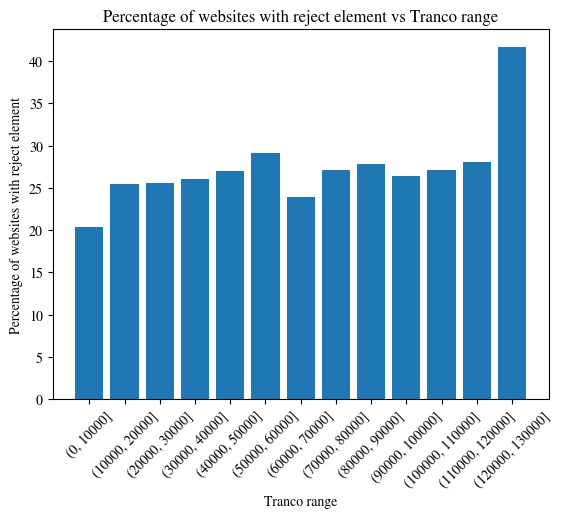

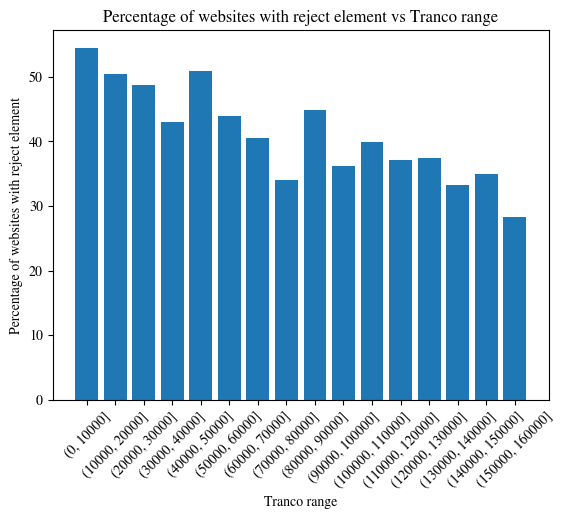

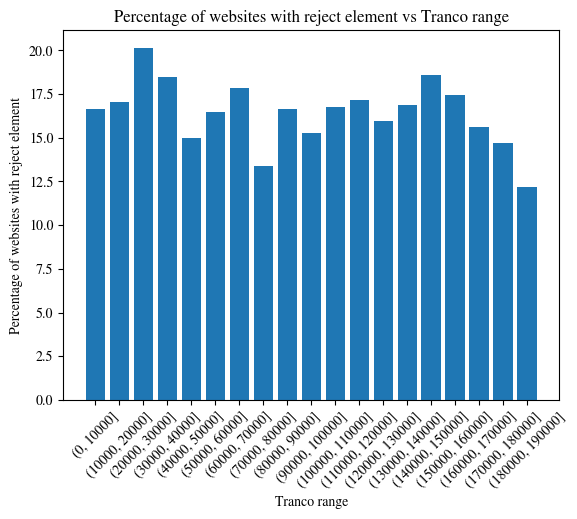

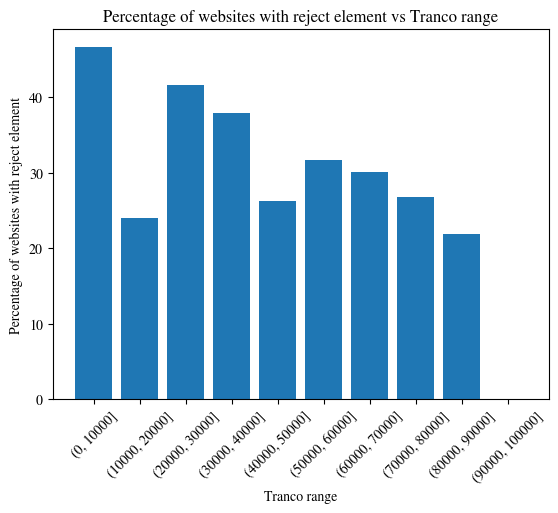

In [107]:
for df in merged_dfs:

    # Define the range and bin size
    start_range = 0
    end_range = df['index_y'].max()
    bin_size = 10000

    # Create bins based on the range and bin size
    bins = pd.cut(df['index_y'], bins=range(start_range, end_range+bin_size, bin_size))

    # Count the number of accept-found values within each bin
    accept_counts = df[df['reject-found'] == True].groupby(bins)['reject-found'].count()
    total_counts = df.groupby(bins)['url'].size()
    #print(total_counts)
    relative_counts = accept_counts/total_counts*100

    # Plot the bin counts
    plt.bar(relative_counts.index.astype(str), relative_counts.values)
    plt.xlabel('Tranco range')
    plt.ylabel('Percentage of websites with reject element')
    plt.title('Percentage of websites with reject element vs Tranco range')
    plt.xticks(rotation=45)
    plt.show()